<a href="https://colab.research.google.com/github/carlos-calderon-cabezas/airbnb-sentiment-analysis/blob/main/airbnb_sentiment_analysis_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis for Airbnb reviews

This project addresses one of the most interesting applications when working with **Natural Language Processing (NLP)** with Python, which consists of **Sentiment Analysis** applied to a real sample data set corresponding to 620 reviews given by guests to a total of 10 accommodations listed within the temporary accommodation platform *Airbnb* for the iconic Ecuadorian tourist city with unique beaches and very welcoming people that is **Montañita**. This project complies with the code style and format guidelines dictated in the ***PEP-8*** manual.

# Initial preprocessing of information

## Installation and import of necessary libraries

Because several of the reviews contain *emojis*, it will be necessary to have a library for their respective treatment and transformation, to later use them when performing the sentiment analysis. The library that is installed is called ***emoji***.

In [ ]:
!pip install emoji

Libraries such as ***pandas***, ***numpy***, ***os***, ***glob*** and ***pathlib*** are also imported, which will be used for different purposes, from manipulating files and folders within the virtual machine to creating ***DataFrames*** and using mathematical functions.

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path

Pandas is configured to prevent it from truncating the text of the entries in each of the columns. Additionally, the base directory is changed with the ***os*** library for greater ease of work. The base directory contains the reviews left by guests of a total of 10 different accommodations located on Montañita beach, Ecuador, as of Friday, January 6, 2024.

In [ ]:
default_max_colwidth = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)

The code block contained in the following cell should be executed only if the ***notebook*** files are stored in ***Google Drive*** and if it is also executed within the ***Google platform Colab***, for which it is necessary to replace *root_path* with the path corresponding to the root directory where the files will be stored. This is so that in subsequent cells it is not necessary to type the full path each time. Conversely, if you run ***notebook*** in a local environment, you can skip the cell entirely.

In [ ]:
root_path = "/content/drive/MyDrive/PORTFOLIO/Sent_Analysis"
reviews_path = os.path.join(root_path, "abb_reviews")
os.chdir(root_path)
# Path shift verificarion
print(f"Current path: {os.getcwd()}")

Current path: /content/drive/MyDrive/PORTFOLIO/Sent_Analysis


A list is obtained with all the files corresponding to the reviews of 10 accommodations in total.

In [ ]:
# We define a pettern to find txt files within the path folder
pattern = '*.txt'

# We use glob to get a list of files which meet the pattern
abb_reviews = glob.glob(os.path.join(reviews_path, pattern))

# Reviews are sorted in alphabetical order
abb_reviews = sorted(
    abb_reviews,
    key=lambda x: int(Path(x).stem.split('_')[-1]))

## Review count for each file

In [ ]:
total_reviews = 0
for review in abb_reviews:
    file_path = Path(review)
    with open(file_path, mode="r", encoding="utf-8") as file:
        foo = file.read()
        print(f'Reviews count in {file_path.name}:\
         {foo.count("Calificación: ")}')
        total_reviews += foo.count("Calificación: ")

print(f"\nReviews total count in {len(abb_reviews)} files: {total_reviews}")

Reviews count in abb_reviews_00.txt:         9
Reviews count in abb_reviews_01.txt:         17
Reviews count in abb_reviews_02.txt:         141
Reviews count in abb_reviews_03.txt:         15
Reviews count in abb_reviews_04.txt:         38
Reviews count in abb_reviews_05.txt:         8
Reviews count in abb_reviews_06.txt:         200
Reviews count in abb_reviews_07.txt:         29
Reviews count in abb_reviews_08.txt:         22
Reviews count in abb_reviews_09.txt:         141

Reviews total count in 10 files: 620


## Feature to extract guest reviews from all files

It can be seen that some of the information collected is not previously structured, that is, there are comments with different attributes than others, such as, for example, "*Stayed for a few weeks*" or "*With pet*". This is why these expressions are eliminated to prevent them from being mistakenly interpreted as comments.

In [ ]:
def extract_reviews(my_file):
    reviews = []
    with open(my_file, mode="r", encoding="utf-8") as f:
        text = f.read()

    # Split text into chunks using "Rate:" as delimiter
    fragments = text.split("Calificación:")[1:]

    # Removing empty fragments
    fragments = [
        fragment.strip() for fragment in fragments if fragment.strip()
    ]
    for fragment in fragments:
        aux = (
            fragment.replace(",·", "")
            .replace("Se quedó unas semanas", "")
            .replace("Estadía de una semana", "")
            .replace("Con mascota", "")
        )
        aux = "\n".join(
            line.strip() for line in aux.splitlines() if line.strip()
        )
        reviews.append(aux.splitlines()[2])

    return reviews

A list is created to store all the reviews (which in turn are in lists) which will be stored in a ***Pandas DataFrame*** along with the ratings.

In [ ]:
reviews_list = []

In [ ]:
for review_file in abb_reviews:
    reviews_list.append(extract_reviews(review_file))

It is verified with the ***len*** function that there are actually ***620*** reviews in total, which is true, and subsequently a plain text file is created to verify the comments.

In [ ]:
print(len(sum(reviews_list, [])))

620


All reviews are saved in a text file to manually verify using an external text editor that each of the 620 lines corresponding to comments are indeed comments and not other attributes of the reviews.

In [ ]:
if not os.path.exists("processing/coment_ALL.txt"):
    with open("processing/coment_ALL.txt", mode="w") as file:
        file.write("\n".join(sum(reviews_list, [])))

## Feature to extract guest ratings from all files

Additionally, for sentiment analysis it is important to extract the rating from 1 to 5 that users gave in each of the reviews to contrast them with the result of the sentiment analysis. As with the comments themselves, the scores are also stored in list format and then create a ***Pandas DataFrame*** with them.

In [ ]:
def extract_reviews(my_file):
    stars = []
    with open(my_file, mode="r", encoding="utf-8") as file:
        text = file.read()
        fragments = text.split("Calificación: ")

    for i in range(1, len(fragments)):
        stars.append(int(fragments[i][0]))

    return stars

In [ ]:
stars_list = []

for review_file in abb_reviews:
    stars_list.append(extract_reviews(review_file))

It is verified that the number of ratings is the same as the number of comments.

In [ ]:
len(sum(stars_list, []))

620

Indexes are created to identify each of the 10 accommodations prior to the creation of the *Pandas* *DataFrame*. Likewise, all the elements of reviews and number of stars for each accommodation are combined into a single list for each case.

In [ ]:
def join_lists(list_):
    return sum(list_, [])

In [ ]:
reviews_number = []

In [ ]:
for review in reviews_list:
    reviews_number.append(len(review))

In [ ]:
reviews_number

[9, 17, 141, 15, 38, 8, 200, 29, 22, 141]

In [ ]:
accomodation_id = []
for index, i in enumerate(reviews_number, start=0):
    accomodation_id.append(list(np.full(i, index)))

accomodation_id = sum(accomodation_id, [])

In [ ]:
reviews_list = join_lists(reviews_list)
stars_list = join_lists(stars_list)

## Pandas DataFrame Construction

In [ ]:
df_reviews = pd.DataFrame({
    "id_alojamiento": accomodation_id,
    "review": reviews_list,
    "stars": stars_list,
})

A sampling is carried out in order to verify that the *DataFrame* was constructed correctly and it is saved in *csv* format for future use.

In [ ]:
df_reviews.sample(5)

,id_alojamiento,review,stars
61,2,"Pésimo,nunca me pude instalar en el departamento pues el anfitrión nunca me contestó cuando lo llamé",1
358,6,"nice place, wa cery cozy had a very nice stay",5
460,8,"Die Unterkunft ist super! Die Lage ist perfekt, 10 Minuten zum nächsten Supermarkt, 10 Minuten zum Strand, 10 Minuten zu Bars und Discos. Trotzdem ist es bei der Unterkunft ruhig und man kann in Ruhe schlafen. Der Host ist auch sehr nett und hilfsbereit!",5
565,9,"Muy recomendable!!! Hemos pasado dos semanas hermosas en el alojamiento de Gijs & Liliana. Ellos son unos anfitriones de lujo, que nos hicieron sentir súper bienvenidos y nos dieron unas recomendaciones excelentes: dónde comprar, dónde comer, etc. La casa es súper cómoda, la cocina está bien equipada y la ducha es increíble. Trabajamos todos los días con una conexión a wifi muy confiable y buena. Está a 5 minutos caminando del mar, ideal para instalarse a trabajar de forma remota y disfrutar de toda la zona!!",5
370,6,"Estuvo bien, el precio es correcto para los servicios.",3


In [ ]:
if not os.path.exists("processing/df_reviews.csv"):
    df_reviews.to_csv("processing/df_reviews.csv", index=False)

The reviews left by guests are then translated to the accommodations with the help of **Google Cloud Translate**, which automatically detects the language of the input texts and translates them into English in order to process them. later when performing the sentiment analysis. For subsequent runs of this *Jupyter Notebook*, the file with the already translated reviews is imported in order not to exceed the quota of translations allowed in the free tier of *Google Cloud Translate*. If you want to replicate the use of ***Google Cloud Translate*** for automatic text translation, you must use an existing ***Google Cloud*** account or create a new account and generate the credentials. access to the API, following the documentation of the cloud service provider. The reason why data is stored in *.xlsx* format instead of *.csv* is that sometimes the ***Pandas*** interpreter confuses certain special characters with data delimiters and a error occurs. wrong reading for some of the records.

In [ ]:
from google.cloud import translate_v2 as translate

# Reading private key from Google Cloud Translate API
client = translate.Client.from_service_account_json(
    "processing/private_key_translate.json"
)

if not os.path.exists("translations/df_reviews_traducido.xlsx"):
    # Function to translate a text
    def translate_text(text, target_language='en'):
        result = client.translate(text, target_language=target_language)
        return result['translatedText']

    # Translation of text in the "review" column
    df_reviews['texto_traducido'] = df_reviews["review"].apply(
        lambda x: translate_text(x, target_language="en")
    )

    # Storing translated reviews for future use
    df_reviews[[
            "id_alojamiento", "review", "texto_traducido", "stars"
        ]].to_excel(
        "translations/df_reviews_traducido.xlsx", index=False
    )

else:
    df_reviews['texto_traducido'] = pd.read_excel(
        "translations/df_reviews_traducido.xlsx"
    )["texto_traducido"]

Random sample of the data is obtained in order to verify the translations made.

In [ ]:
df_reviews.sample(10)

,id_alojamiento,review,stars,texto_traducido
336,6,"El lugar es pequeño pero perfecto, muy limpio y con una vista increíble",5,"The place is small but perfect, very clean and with an incredible view"
139,2,"Excelente lugar, buen estilo y completo. El espacio es pequeño pero suficiente para un viaje en solitario o pareja. Buena comunicación y ubicación",5,"Excellent place, good style and complete. The space is small but enough for a solo or couple trip. Good communication and location"
394,6,"Un lugar con excelentes servicios (internet, cocina, bañera, posibilidad de lavadora) y una ubicación estratégica: cercana a la zona turística y a su vez alejada del ruido nocturno de Montañita, lo que permite un buen descanso. La única recomendación es que el aseo del lugar debe mejorar haciendo una limpieza de todos los elementos del espacio.",4,"A place with excellent services (internet, kitchen, bathtub, possibility of washing machine) and a strategic location: close to the tourist area and at the same time away from the night noise of Montañita, which allows for a good rest. The only recommendation is that the cleanliness of the place should improve by cleaning all the elements in the space."
140,2,Muy buen lugar,5,Very good place
489,9,Con niños,5,With children
73,2,Todo muy bien,5,All very well
209,4,"Overall, the house was very clean and Tania was fast at responding and accommodating. However, It was very noisy with many dogs running around, and construction going on under the house. The bathroom would also flood while you tried to take a shower as there was no curtain/wall. The kitchen is also not ideal if you're looking to stay in and cook rather than go out. A few small improvements (nicer cooking setup, quiter dogs, and a shower curtain would make this place much more livable.",3,"Overall, the house was very clean and Tania was fast at responding and accommodating. However, It was very noisy with many dogs running around, and construction going on under the house. The bathroom would also flood while you tried to take a shower as there was no curtain/wall. The kitchen is also not ideal if you're looking to stay in and cook rather than go out. A few small improvements (nicer cooking setup, quiter dogs, and a shower curtain would make this place much more livable."
216,4,"We stayed 4 nights at Tania’s place. She picked us up from the supermarket in Montanita, which was very helpful and convenient. The place was just awesome! Relaxing and peaceful. We also appreciated the bed and really good mosquito net! We enjoyed our stay and felt sad when we had to leave. Big thanks to Tania, our kind, warm and helpful host!",5,"We stayed 4 nights at Tania’s place. She picked us up from the supermarket in Montanita, which was very helpful and convenient. The place was just awesome! Relaxing and peaceful. We also appreciated the bed and really good mosquito net! We enjoyed our stay and felt sad when we had to leave. Big thanks to Tania, our kind, warm and helpful host!"
609,9,"What a beautiful place, tucked away in the quiet town of Manglaralto. We arrived around 4 pm, and even though our hosts weren't there (cause they were at work), everything was well prepared for our arrival. The keys were available and the apartment was clean and everything well in its place. The apartment is spacious with all of the amenities and utensils you may require to make your stay as pleasant as possible. The apartment is located a 5 min walk from the beach, and around a 25 min walk along the beach from Montanita. Manglaralto is a very small town, only 5 mins away by taxi from Montanita, which makes it the perfect place to stay if you don't like the hustle and bustle of Montanita, but still crave good food and drinks. Gijs and Liliana were absolutely amazing. They helped us without hesitation, always with a smile. They did more than was expected of them, and they are just generally very nice people. I look forward to our next visit to Manglaralto and to Gijs & Lili

# Preparation of data for Sentiment Analysis

## Removal of punctuation marks, articles and unnecessary words:

The **nltk** library is imported to detect and eliminate from the comments left by guests and previously translated into English, the articles, words and punctuation marks that will not be useful when performing the sentiment analysis, and is stored in a new column of the *DataFrame* called "*text_without_stopwords*".

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_reviews["texto_sin_stopwords"] = df_reviews["texto_traducido"].apply(
    lambda x: remove_stopwords(x)
)

Regular expressions are also used to treat excess spaces as well as punctuation marks and unnecessary characters for sentiment analysis. In addition, the data is prepared for the processing of emojis.

In [ ]:
import re


def extract_non_letters(texto):
    return list(set(re.sub('[a-zA-Z0-9]', '', texto)))

In [ ]:
df_reviews["no_text"] = df_reviews["texto_sin_stopwords"].apply(
    lambda x: extract_non_letters(x)
)

In [ ]:
non_text_chars = list(set(df_reviews["no_text"].sum()))
non_text_chars.remove(" ")
df_reviews.drop(["no_text"], axis=1, inplace=True)

## Emoji treatment

list of all the emojis present in the reviews given by guests is extracted from the previously defined variable "*non_text_chars*". Additionally, an English word is assigned to give an appropriate interpretation to each of these. Finally, emojis are replaced with their word equivalents.

In [ ]:
import emoji

emojis_list = [i for i in non_text_chars if emoji.is_emoji(i)]
emojis_dict = {
    '✨': 'sparkling',
    '🙃': 'sarcastic',
    '💖': 'beautiful',
    '😔': 'sad',
    '🙌': 'celebration',
    '😘': 'affectionate',
    '⭐': 'star',
    '👏': 'applause',
    '💕': 'affectionate',
    '😊': 'happy',
    '😍': 'admiration',
    '💓': 'emotion',
    '❣': 'emotion',
    '💜': 'affection',
    '🙈': 'playful',
    '🤗': 'friendly',
    '👌': 'approval',
    '🏻': '',
    '🍻': 'celebration',
    '🌞': 'cheerful',
    '❤': 'love',
    '♥': 'love',
    '💯': 'perfect',
    '👍': 'approval'
}

In [ ]:
non_emoji_chars = [i for i in non_text_chars if not emoji.is_emoji(i)]

In [ ]:
def remove_symbols(text):
    for char in non_emoji_chars:
        text = text.replace(char, "")
    return text

In [ ]:
df_reviews["texto_sin_stopwords"] = df_reviews["texto_sin_stopwords"].apply(
    lambda x: remove_symbols(x)
)

In [ ]:
df_reviews["texto_sin_stopwords"] = df_reviews["texto_sin_stopwords"].apply(
    lambda x: " ".join(x.split())
)

A function is defined to replace emojis with their word equivalents.

In [ ]:
def replace_emojis(text):
    for (key, value) in emojis_dict.items():
        text = text.replace(key, f" {value} ")
    return text

In [ ]:
df_reviews["texto_sin_emojis"] = df_reviews["texto_sin_stopwords"].apply(
    lambda x: replace_emojis(x)
)
df_reviews["texto_sin_emojis"] = df_reviews["texto_sin_emojis"].apply(
    lambda x: " ".join(x.split())
)

Two comments containing emojis are verified to show that the removal of *stopwords* and the replacement of emojis with ***equivalent words*** was done correctly, and finally this version of the *DataFrame* clean of emojis is saved in a file of Microsoft Excel.

In [ ]:
df_reviews[["texto_traducido", "texto_sin_stopwords", "texto_sin_emojis"]] \
    .iloc[[76, 263], :]

,texto_traducido,texto_sin_stopwords,texto_sin_emojis
76,"Everything is very nice, safe and cozy😊",Everything nice safe cozy😊,Everything nice safe cozy happy
263,A quiet place with a good location. They are pet friendly 😊,quiet place good location pet friendly 😊,quiet place good location pet friendly happy


In [ ]:
if not os.path.exists("processing/df_limpio_emojis.xlsx"):
    df_reviews.to_excel("processing/df_limpio_emojis.xlsx")

# Sentiment Analysis

Finally, a ***sentiment analysis*** is carried out on all the comments present, for which the ***nltk*** library is imported and the ***vader_lexicon*** component is used for the polarity analysis in each of the comments. First, a function is defined that classifies the comments based on their polarity into the categories of **Positive**, **Negative** or **Neutral**, and the results are sent using a *lambda* function. to a new column of the Pandas ***DataFrame***.

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def classify_comment(comentario):
    polarity = sia.polarity_scores(comentario)['compound']
    if polarity > 0.05:
        return "Positivo"
    elif polarity < -0.05:
        return "Negativo"
    else:
        return "Neutral"

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_reviews["Sentimiento"] = df_reviews["texto_sin_emojis"].apply(
    lambda x: classify_comment(x)
)

Sample of the columns corresponding to the ***comments translated into English*** and the ***feelings detected***.

In [ ]:
df_reviews[["texto_sin_emojis", "Sentimiento"]].sample(3)

,texto_sin_emojis,Sentimiento
371,1 Bed bugs stayed based bites got face neck arm bed bug bites certain look different mosquito bites reason canceled 2nd planned stay reorganize trip additional expense host Gabe different sheets brought remove bed bugs Maybe future resolve issue,Positivo
53,cozy place good location,Positivo
566,Great apt hosts,Positivo


Additionally, the reviews are optionally translated into Spanish in order to perform a manual classification of the feelings that would be expected in each case.

In [ ]:
from google.cloud import translate_v2 as translate

# Reading private key from Google Cloud Translate API
client = translate.Client.from_service_account_json(
    "processing/private_key_translate.json"
)

if not os.path.exists("translations/df_reviews_traducido_es.xlsx"):
    # Function to translate a text
    def translate_text(text, target_language='es'):
        result = client.translate(text, target_language=target_language)
        return result['translatedText']

    # Translation of text in the "review" column
    df_reviews['texto_traducido_es'] = df_reviews["review"].apply(
        lambda x: translate_text(x, target_language="es")
    )

    # Storing translated reviews for future use
    df_reviews[[
            "id_alojamiento", "review", "texto_traducido", "stars"
        ]].to_excel(
        "translations/df_reviews_traducido_es.xlsx", index=False
    )

else:
    df_reviews['texto_traducido_es'] = pd.read_excel(
        "translations/df_reviews_traducido_es.xlsx"
    )["texto_traducido"]

In [ ]:
if not os.path.exists("output/sentimientos.xlsx"):
    df_reviews.to_excel("output/sentimientos.xlsx", index= False)

Restored the maximum width of columns displayed in the ***PandasDataFrame*** for better visualization.

In [ ]:
pd.set_option('display.max_colwidth', default_max_colwidth)

The *'real'* polarity of the reviews is manually evaluated in order to create a confusion matrix and perform an analysis of the accuracy of this model. However, it is important to keep in mind that this analysis of the *'real'* polarity or validation data set is subject to the criteria of the person who performs it, which is why it cannot be considered at any time as a model. free of bias and interpretation.

In [ ]:
df_sentiments = pd.read_excel("output/matriz_sentimientos.xlsx")
df_sentiments = df_sentiments[["Sentimiento", "Real"]]

In [ ]:
df_sentiments.sample(5)

,Sentimiento,Real
10,Positivo,Positivo
261,Neutral,Positivo
603,Positivo,Positivo
413,Positivo,Positivo
14,Positivo,Positivo


In [ ]:
categories = df_sentiments["Sentimiento"].unique()
categories

array(['Positivo', 'Negativo', 'Neutral'], dtype=object)

## Confusion matrix

The three-category confusion matrix is created with the help of ***sklearn.metrics.confusion_matrix*** based on the three sentiment categories defined above.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(
    df_sentiments["Real"],
    df_sentiments["Sentimiento"],
    labels=categories
)

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=categories,
    columns=categories
)

In [ ]:
conf_matrix_df

,Positivo,Negativo,Neutral
Positivo,536,1,15
Negativo,8,10,3
Neutral,29,5,13


The 3-dimensional confusion matrix is represented graphically, using the ***seaborn*** and ***matplotlib*** libs.

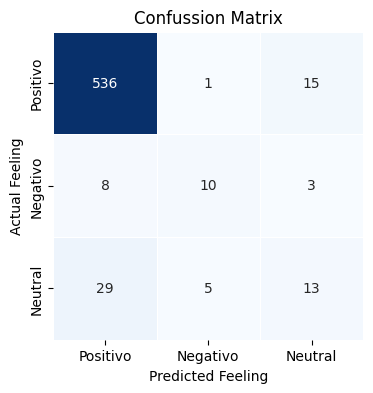

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
sns.heatmap(
    conf_matrix_df,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=.5,
    cbar=False
)

plt.title('Confussion Matrix')
plt.xlabel('Predicted Feeling')
plt.ylabel('Actual Feeling')
plt.savefig("output/conf_matrix.png")
plt.show()

# Conclusion

Sentiment analysis applied to Airbnb reviews has proven to be a powerful tool for understanding guest perceptions. In this study, a clear predominance of positive comments was observed, which is a good indication of overall customer satisfaction. However, it is crucial to delve into the details these comments reveal.

## Analysis of Positive Comments
The model has accurately classified positive sentiments. The most mentioned aspects include:
- **Location**: Guests highly value proximity to the city and tourist attractions.
- **Comfort**: Frequent comments about the comfort and coziness of the accommodations.

### Example of Positive Comments:
- "The place is super cool, cozy, and close to the city."
- "I loved the comfort of the accommodation and the proximity to major attractions."

### Recommendations for Hosts:
- **Marketing Strategy**: Focus advertising campaigns on highlighting the location and comfort of the accommodations.
- **Ad Optimization**: Use positive keywords in the ad descriptions to attract more guests.

## Analysis of Negative Comments
The model shows a higher error rate in classifying negative and neutral comments. The most mentioned negative aspects include:
- **Cleanliness**: Frequent comments about insufficient cleaning of the accommodations.
- **Noise**: Complaints about noise in the surroundings of the accommodation.

### Example of Negative Comments:
- "The place was dirty and not cleaned properly."
- "There was a lot of noise, making it difficult to rest."

### Recommendations for Hosts:
- **Service Improvement**: Increase cleaning hours and ensure a deeper clean between stays.
- **Noise Management**: Implement measures to reduce noise, such as soundproof windows or informing guests about quiet hours.

## Commercial Value of the Analysis
This analysis offers significant value both for Airbnb and hosts by providing a clear view of areas for improvement and strengths to highlight. By implementing these recommendations, hosts can improve customer satisfaction, increase bookings, and strengthen the reputation of their accommodations.
